# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"
temp_units = "imperial"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | pacific grove
Processing Record 3 of Set 1 | victoria
Processing Record 4 of Set 1 | tual
Processing Record 5 of Set 1 | vitry-le-francois
Processing Record 6 of Set 1 | umea
City not found. Skipping...
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | chulym
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | axim
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | esso
City not found. Skipping...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | oudtshoorn
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | kununurra
Processing Record 19 of Set 1 | seabra
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | suez
Processing Record 23 of Set 1 | aswan
Processing Record 24 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
weather_dict = ({"City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds,
                })
weather_dataframe = pd.DataFrame(weather_dict)

weather_dataframe.head()


# weather_dataframe.to_csv(output_data_file)

# weather_dataframe.count()

# weather_dataframe.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kaitangata,16,NZ,1627010116,48,-46.2817,169.8464,53.92,4.27
1,pacific grove,98,US,1627010582,84,38.4820,-90.7415,81.18,5.93
2,victoria,47,HK,1627010143,77,22.2855,114.1577,92.25,5.99
3,tual,100,ID,1627010583,92,-5.6667,132.7500,75.76,13.31
4,vitry-le-francois,5,FR,1627010583,90,48.7333,4.5833,59.86,3.89


In [41]:
weather_dataframe.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,534.000000,5.340000e+02,534.000000,534.000000,534.000000,534.000000,534.000000
mean,54.074906,1.627011e+09,71.529963,23.990479,22.745375,69.226442,7.805449
std,39.174958,2.234493e+02,18.385645,31.700182,86.380970,13.149198,5.530742
min,0.000000,1.627010e+09,17.000000,-54.800000,-175.200000,37.270000,0.000000
25%,11.000000,1.627011e+09,61.000000,-2.564900,-44.093800,59.792500,3.770000
50%,59.500000,1.627011e+09,76.000000,29.971700,26.067650,71.030000,6.710000
75%,96.000000,1.627011e+09,86.000000,51.175625,92.094400,79.427500,10.360000
max,100.000000,1.627011e+09,100.000000,78.218600,178.416700,98.580000,37.650000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [42]:
humidity_less = weather_dataframe[weather_dataframe['Humidity'] < 100]
humidity_less.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,531.000000,5.310000e+02,531.000000,531.000000,531.000000,531.000000,531.000000
mean,53.930320,1.627011e+09,71.369115,23.899554,22.614721,69.207947,7.757458
std,39.234333,2.239018e+02,18.312057,31.740732,86.486583,13.157840,5.477949
min,0.000000,1.627010e+09,17.000000,-54.800000,-175.200000,37.270000,0.000000
25%,10.500000,1.627011e+09,61.000000,-2.612200,-45.052700,59.815000,3.750000
50%,59.000000,1.627011e+09,76.000000,29.969700,25.735300,70.930000,6.710000
75%,96.000000,1.627011e+09,85.500000,51.172650,92.018500,79.375000,10.360000
max,100.000000,1.627011e+09,99.000000,78.218600,178.416700,98.580000,37.650000


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

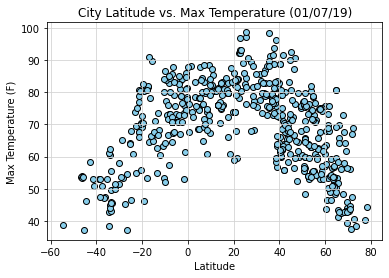

In [37]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Resources/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

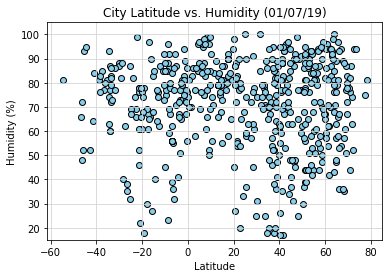

In [38]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Resources/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

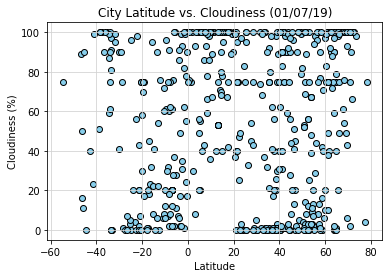

In [39]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Resources/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

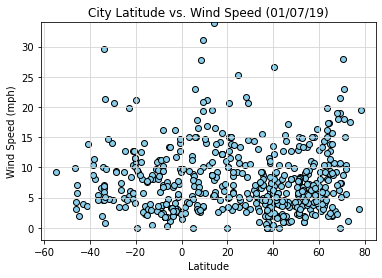

In [40]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Resources/fig4.png")
plt.show()

## Linear Regression

In [24]:
#Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

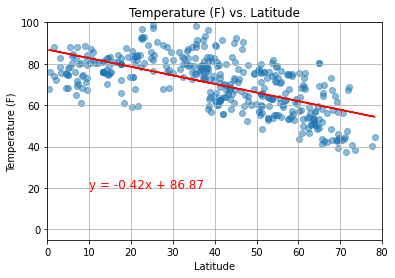

The r-value is:-0.6341716468968882


<Figure size 432x288 with 0 Axes>

In [57]:
#Northern Hemisphere - Temperature (F) vs. Latitude
northern_hemis= weather_dataframe[weather_dataframe['Lat']>=0]
northern_hemis
plt.scatter(northern_hemis['Lat'], northern_hemis['Max Temp'], alpha=0.5)
x_values = northern_hemis["Lat"]
y_values = northern_hemis["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Temperature (F) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")
plt.savefig("Resources/Northern Hemisphere - Temperature (F) vs. Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

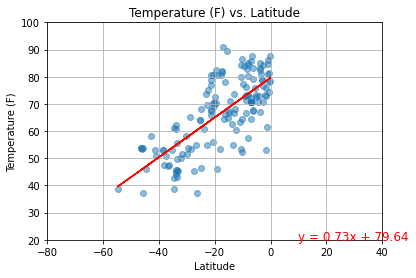

The r-value is:0.7290661027842474


<Figure size 432x288 with 0 Axes>

In [56]:
#Southern Hemisphere - Temperature (F) vs. Latitude
southern_hemis= weather_dataframe[weather_dataframe['Lat']<0]
southern_hemis
plt.scatter(southern_hemis['Lat'], southern_hemis['Max Temp'], alpha=0.5)
x_values = southern_hemis["Lat"]
y_values = southern_hemis["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Temperature (F) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(20, 100)
plt.xlim(-80, 40)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")
plt.savefig("Resources/Southern Hemisphere - Temperature (F) vs. Latitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

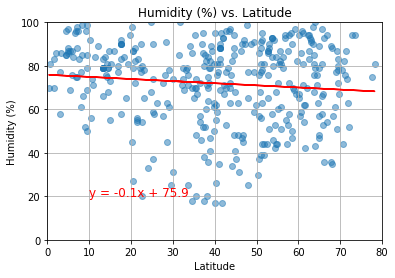

The r-value is:-0.10201054867649142


<Figure size 432x288 with 0 Axes>

In [55]:
#Northern Hemisphere - Humidity (%) vs. Latitude
northern_hemis1= weather_dataframe[weather_dataframe['Lat']>=0]
northern_hemis1
plt.scatter(northern_hemis1['Lat'], northern_hemis1['Humidity'], alpha=0.5)
x_values = northern_hemis1["Lat"]
y_values = northern_hemis1["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Humidity (%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.xlim(0, 80)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")
plt.savefig("Resources/Northern Hemisphere - Humidity (%) vs. Latitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

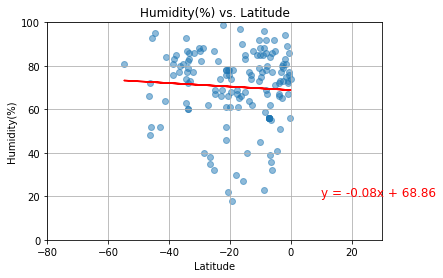

The r-value is:-0.06295599839468913


<Figure size 432x288 with 0 Axes>

In [54]:
# Southern Hemisphere - Humidity (%) vs. Latitude
southern_hemis1= weather_dataframe[weather_dataframe['Lat']<0]
southern_hemis1
plt.scatter(southern_hemis1['Lat'],southern_hemis1['Humidity'], alpha=0.5)
x_values = southern_hemis1["Lat"]
y_values = southern_hemis1["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Humidity(%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.xlim(-80, 30)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")
plt.savefig("Resources/Southern Hemisphere - Humidity (%) vs. Latitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

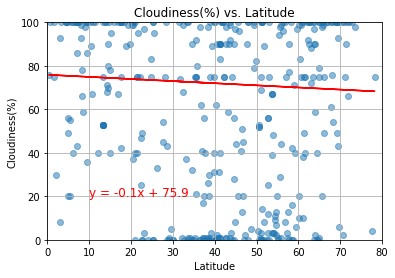

The r-value is:-0.10201054867649142


<Figure size 432x288 with 0 Axes>

In [53]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
northern_hemis2= weather_dataframe[weather_dataframe['Lat']>=0]
northern_hemis2
plt.scatter(northern_hemis2['Lat'], northern_hemis2['Cloudiness'], alpha=0.5)
x_values = northern_hemis2["Lat"]
y_values = northern_hemis2["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Cloudiness(%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.xlim(0, 80)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")
plt.savefig("Resources/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

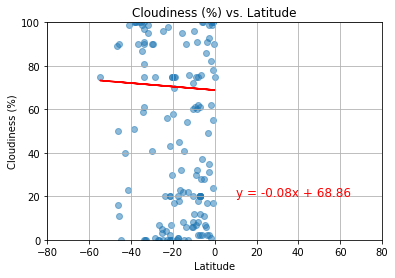

The r-value is:-0.06295599839468913


<Figure size 432x288 with 0 Axes>

In [52]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
southern_hemis2= weather_dataframe[weather_dataframe['Lat']<0]
southern_hemis2
plt.scatter(southern_hemis2['Lat'], southern_hemis2['Cloudiness'], alpha=0.5)
x_values = southern_hemis2["Lat"]
y_values = southern_hemis2["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Cloudiness (%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.xlim(-80, 80)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")
plt.savefig("Resources/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

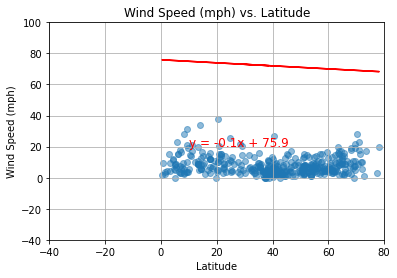

The r-value is:-0.10201054867649142


<Figure size 432x288 with 0 Axes>

In [50]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
northern_hemis4= weather_dataframe[weather_dataframe['Lat']>=0]
northern_hemis4
plt.scatter(northern_hemis4['Lat'], northern_hemis4['Wind Speed'], alpha=0.5)
x_values = northern_hemis4["Lat"]
y_values = northern_hemis4["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Wind Speed (mph) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(-40, 100)
plt.xlim(-40, 80)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")
plt.savefig("Resources/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

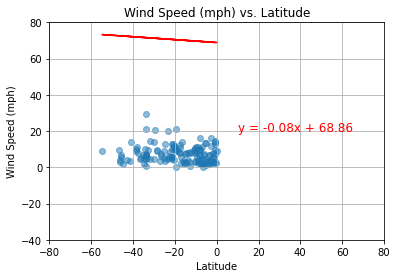

The r-value is:-0.06295599839468913


<Figure size 432x288 with 0 Axes>

In [48]:
southern_hemis4= weather_dataframe[weather_dataframe['Lat']<0]
southern_hemis4
plt.scatter(southern_hemis4['Lat'], southern_hemis4['Wind Speed'], alpha=0.5)
x_values = southern_hemis4["Lat"]
y_values = southern_hemis4["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(-40,80)
plt.xlim(-80, 80)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")
plt.savefig("Resources/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")